In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore");

In [2]:
df = pd.read_csv("30_inj_cyc_e117_deneme.csv")

In [3]:
df.head()

,Unnamed: 0,date,reason,timCool1,strCushion1,tmpMoldZone3,tmpFlange1,tmpMoldZone4,strPlasticisation1,tmpMoldZone1,...,tmpMoldZone12,decMold,prsHoldSpec1,tmpNozle1,timestamp,prsInjectionHyd1,timCycle,sfc,frcClamp,timPlasticisation1
0,18793,2020-12-28T03:21:21.000,[],23.00,18.2,301.0,93.0,300.0,111.2,301.0,...,0.0,2297,822.0,260.0,2020-12-28 06:21:21.0,64.41,57.52,[],4100.0,13.78
1,15100,2020-12-24T11:42:24.000,[],20.01,17.9,300.0,94.0,299.0,111.3,300.0,...,0.0,2297,837.0,260.0,2020-12-24 14:42:24.0,65.60,54.45,[],4000.0,13.65
2,15099,2020-12-24T11:41:31.000,[],20.01,18.1,300.0,94.0,299.0,111.3,300.0,...,0.0,2297,841.0,260.0,2020-12-24 14:41:31.0,65.89,54.44,[],4000.0,13.64
3,15098,2020-12-24T11:50:33.000,[],20.00,17.3,300.0,93.0,300.0,111.3,300.0,...,0.0,2297,812.0,260.0,2020-12-24 14:50:33.0,63.65,54.45,[],4000.0,13.79
4,15097,2020-12-24T11:49:41.000,[],20.01,17.6,300.0,93.0,300.0,111.2,300.0,...,0.0,2297,822.0,260.0,2020-12-24 14:49:41.0,64.45,54.45,[],4000.0,13.84


In [4]:
df.describe()

,Unnamed: 0,timCool1,strCushion1,tmpMoldZone3,tmpFlange1,tmpMoldZone4,strPlasticisation1,tmpMoldZone1,tmpMoldZone2,spdInjection1,...,prsTransferHyd1,tmpMoldZone13,tmpMoldZone12,decMold,prsHoldSpec1,tmpNozle1,prsInjectionHyd1,timCycle,frcClamp,timPlasticisation1
count,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,...,29454.000000,29454.0,29454.0,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000,29454.000000
mean,14726.500000,19.732267,24.498211,293.849528,90.816290,294.110172,107.571657,293.757792,293.826984,29.717824,...,54.906003,0.0,0.0,2359.310926,741.912542,255.173219,60.300965,50.005905,3805.110342,10.714572
std,8502.781751,4.681738,6.758521,5.888146,2.978134,5.906098,8.846235,5.960497,5.922531,7.293233,...,16.211853,0.0,0.0,188.166055,116.603704,5.062292,11.284600,8.768022,374.734136,4.335723
min,0.000000,15.000000,0.400000,258.000000,71.000000,259.000000,35.300000,259.000000,259.000000,8.300000,...,9.600000,0.0,0.0,1778.000000,71.000000,234.000000,9.730000,29.500000,3300.000000,1.580000
25%,7363.250000,16.000000,18.600000,291.000000,89.000000,294.000000,109.200000,288.000000,291.000000,26.000000,...,37.770000,0.0,0.0,2297.000000,603.000000,250.000000,47.320000,41.170000,3400.000000,6.280000
50%,14726.500000,20.010000,19.500000,295.000000,91.000000,295.000000,110.900000,295.000000,295.000000,26.600000,...,62.340000,0.0,0.0,2297.000000,784.000000,259.000000,63.020000,54.450000,3800.000000,13.180000
75%,22089.750000,23.020000,32.600000,300.000000,93.000000,299.000000,111.200000,300.000000,300.000000,33.200000,...,65.050000,0.0,0.0,2535.000000,821.000000,260.000000,65.930000,57.600000,4200.000000,13.930000
max,29453.000000,301.340000,88.000000,330.000000,98.000000,334.000000,116.000000,330.000000,330.000000,80.200000,...,95.660000,0.0,0.0,2535.000000,1285.000000,263.000000,100.740000,463.540000,4700.000000,300.000000


In [5]:
df['reason'] = df['reason'].replace(['[]'],0)

In [6]:
df['reason'][df['reason'] != 0] = 1

In [7]:
drop_list = ['Unnamed: 0', 'date', 'cntCycle','stsMachine','timestamp','sfc','decMold']

In [8]:
df2 = df.drop(drop_list, axis=1)

In [9]:
drop_list2 = ['tmpMoldZone12', 'tmpMoldZone13', 'tmpMoldZone10', 'tmpMoldZone11', 'tmpMoldZone20', 'tmpMoldZone16', 'tmpMoldZone17','tmpMoldZone14','tmpMoldZone15','tmpMoldZone18','tmpMoldZone19','tmpMoldZone9']

In [10]:
df2.drop(drop_list2, axis=1, inplace=True)

In [11]:
df2.head()

,reason,timCool1,strCushion1,tmpMoldZone3,tmpFlange1,tmpMoldZone4,strPlasticisation1,tmpMoldZone1,tmpMoldZone2,spdInjection1,...,volShot1,timFill1,timMoldOpen,prsTransferHyd1,prsHoldSpec1,tmpNozle1,prsInjectionHyd1,timCycle,frcClamp,timPlasticisation1
0,0,23.00,18.2,301.0,93.0,300.0,111.2,301.0,300.0,26.0,...,0.0,4.70,2.42,64.07,822.0,260.0,64.41,57.52,4100.0,13.78
1,0,20.01,17.9,300.0,94.0,299.0,111.3,300.0,300.0,26.6,...,0.0,4.71,2.43,65.30,837.0,260.0,65.60,54.45,4000.0,13.65
2,0,20.01,18.1,300.0,94.0,299.0,111.3,300.0,300.0,26.0,...,0.0,4.71,2.43,65.60,841.0,260.0,65.89,54.44,4000.0,13.64
3,0,20.00,17.3,300.0,93.0,300.0,111.3,300.0,300.0,26.0,...,0.0,4.70,2.43,63.31,812.0,260.0,63.65,54.45,4000.0,13.79
4,0,20.01,17.6,300.0,93.0,300.0,111.2,300.0,300.0,26.0,...,0.0,4.70,2.43,64.24,822.0,260.0,64.45,54.45,4000.0,13.84


In [12]:
df2 = df2.astype({"reason": int})

<AxesSubplot:>

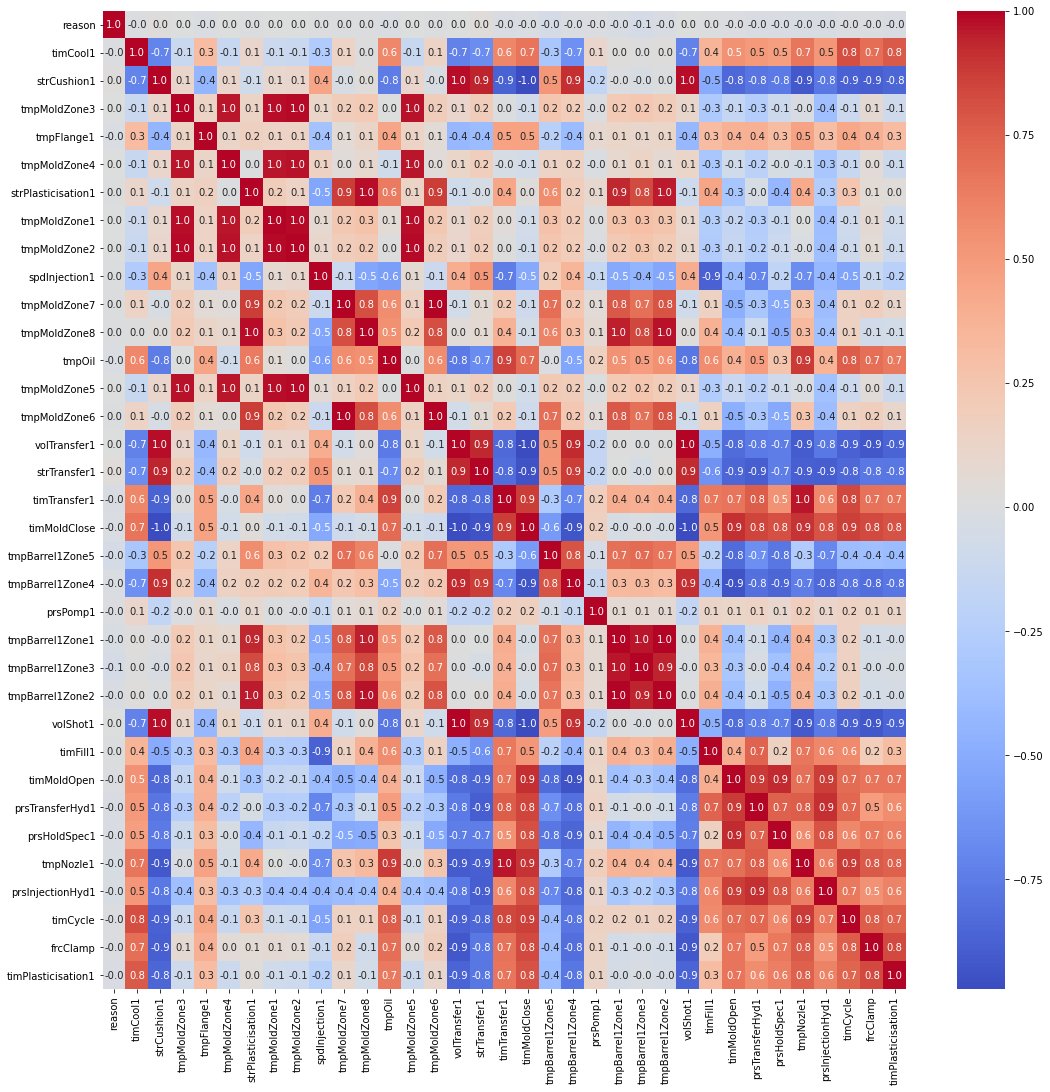

In [13]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm',fmt='.1f')

In [14]:
df2.drop('reason', axis=1, inplace=True)

In [16]:
y = df2['timCycle']
X = df2.drop('timCycle', axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101, shuffle=True)

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
lm.coef_

array([ 8.75586286e-01,  4.25549537e-02, -9.66585397e-02, -1.71796309e-02,
        5.65643483e-02,  1.51087337e+00,  2.00744121e-01, -7.72397334e-02,
       -1.35177700e-01,  2.75395100e-01, -8.59920774e-02,  2.49475456e-02,
        4.65428342e-02, -3.77440509e-01,  4.36495486e-02, -1.38562473e-01,
        9.46921662e-01,  4.72909745e+00,  4.16663870e-02,  2.21632459e-01,
       -5.62691181e-04, -1.65828018e-01, -3.03619357e-01, -3.21602490e-01,
       -7.99837192e-02, -5.99157818e-01, -6.10878617e+00, -2.73263623e-01,
       -5.11185207e-03,  3.11842860e-01,  2.41819030e-01,  5.61969579e-04,
       -3.34343118e-01])

In [23]:
y_pred_train = lm.predict(X_train)

In [24]:
y_pred = lm.predict(X_test)

Text(0.5, 1.0, 'Scatter Plot of Cycle time prediction')

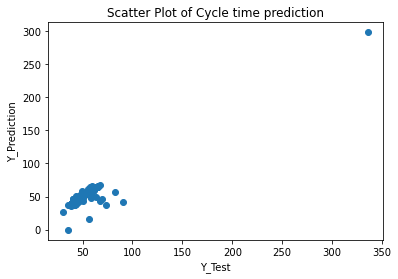

In [31]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y_Test')
plt.ylabel('Y_Prediction')
plt.title('Scatter Plot of Cycle time prediction')

In [26]:
metrics.mean_absolute_error(y_test,y_pred)

0.3292507693619345

In [27]:
metrics.mean_squared_error(y_test,y_pred)

1.3990635787383852

In [28]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.1828201802211464

<AxesSubplot:xlabel='timCycle', ylabel='Density'>

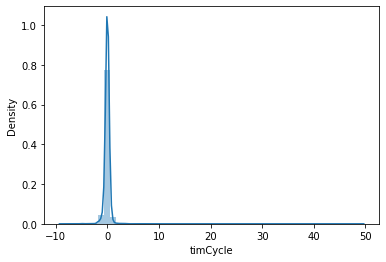

In [29]:
sns.distplot(y_test-y_pred)

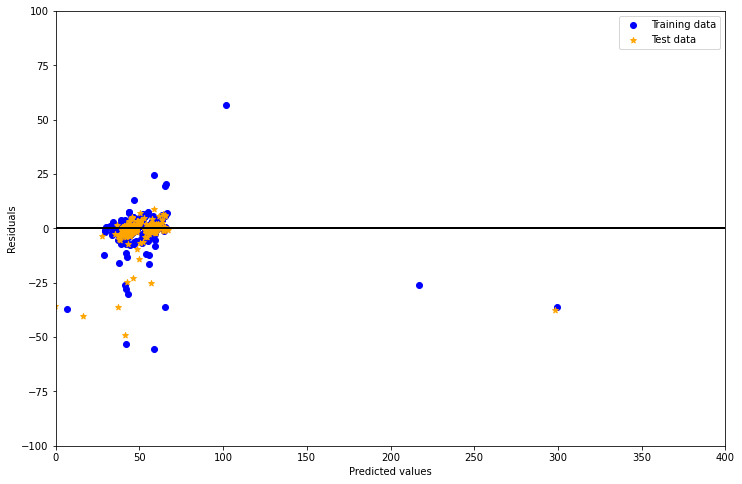

In [34]:
plt.figure(figsize=(12,8))
plt.scatter(y_pred_train, y_pred_train - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_pred, y_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=0, xmax=2500000, lw=2, color='k')
plt.xlim([0, 400])
plt.ylim([-100, 100])
plt.show()